In [1]:
#导入数据
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('nihe.csv')
data = np.array(data)

In [2]:
#划分训练集和测试集
m = data.shape[0]
n = data.shape[1]
test_split = 0.9
train_data = data[0:int(test_split*m), 0:(n-1)]
train_target = data[0:int(test_split*m), (n-1)]
test_data = data[int(test_split*m): , 0:(n-1)]
test_target = data[int(test_split*m): , (n-1)]

In [3]:
#对数据进行标准化
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
#构建网络模型
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(train_data.shape[1],)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 209 (836.00 Byte)
Trainable params: 209 (836.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#编译网络
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [8]:
#拟合训练网络
history = model.fit(train_data, train_target, epochs=100, validation_split=0.2, batch_size=32)

Epoch 1/100


23/23 [==============================] - 1s 8ms/step - loss: 38393.0000 - mae: 193.4124 - val_loss: 38476.0273 - val_mae: 193.7265
Epoch 2/100
23/23 [==============================] - 0s 2ms/step - loss: 38314.1562 - mae: 193.2136 - val_loss: 38415.4336 - val_mae: 193.5746
Epoch 3/100
23/23 [==============================] - 0s 2ms/step - loss: 38257.3984 - mae: 193.0682 - val_loss: 38356.4570 - val_mae: 193.4222
Epoch 4/100
23/23 [==============================] - 0s 2ms/step - loss: 38199.3906 - mae: 192.9157 - val_loss: 38294.7344 - val_mae: 193.2591
Epoch 5/100
23/23 [==============================] - 0s 2ms/step - loss: 38132.6836 - mae: 192.7392 - val_loss: 38223.9297 - val_mae: 193.0703
Epoch 6/100
23/23 [==============================] - 0s 2ms/step - loss: 38056.3906 - mae: 192.5370 - val_loss: 38143.5352 - val_mae: 192.8562
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 37968.8047 - mae: 192.3054 - val_loss: 38050.3867 - val_mae: 192.60

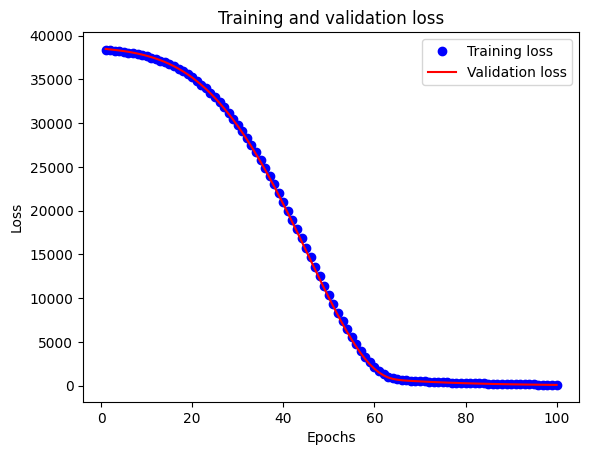

In [9]:
#画出训练集和验证集损失曲线 mse
mae = history.history['mae']
val_mae = history.history['val_mae']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(mae)+1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid red line"
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


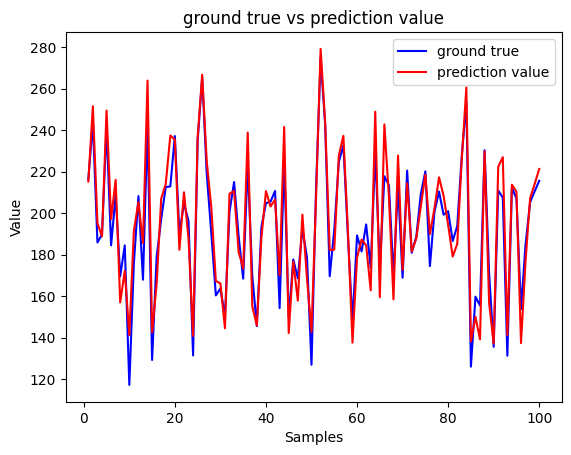

In [10]:
#在测试集上画出预测值和实际值曲线
predictions = model.predict(test_data)
samples = range(1, len(test_data)+1)
plt.plot(samples, test_target, 'b', label='ground true')
plt.plot(samples, predictions, 'r', label='prediction value')
plt.title('ground true vs prediction value')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

In [11]:
predictions
len(test_data)

100